<a href="https://colab.research.google.com/github/ash827/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Ashley_Eddings_LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-19 01:53:39--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip.1’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   914KB/s    in 22s     

2019-07-19 01:54:01 (906 KB/s) - ‘LoanStats_2019Q1.csv.zip.1’ saved [20240936]



In [2]:
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
  inflating: LoanStats_2019Q1.csv    


In [3]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [4]:
import pandas as pd
df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2) # if you ass engine='python' it'll remove the parser error
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,71.4,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,100.0,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,50.0,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [6]:
df[df.loan_amnt.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [7]:
!tail LoanStats_2019Q1.csv

"","","5000","5000","5000"," 36 months"," 13.56%","169.83","C","C1","","n/a","MORTGAGE","48000","Not Verified","Jan-2019","Current","n","","","home_improvement","Home improvement","338xx","FL","8.28","2","May-2006","0","11","","8","0","3846","13.6%","21","w","4420.40","4420.40","841.62","841.62","579.60","262.02","0.0","0.0","0.0","Jun-2019","169.83","Jul-2019","Jun-2019","0","","1","Individual","","","","0","0","35666","0","1","0","0","49","5336","47","0","2","0","23","28200","0","3","0","2","4458","","","0","0","99","151","13","13","1","","","","11","0","0","3","0","1","4","6","16","3","8","0","0","0","0","90.5","","0","0","88613","9182","0","11413","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","40000","40000","40000"," 36 months","  6.46%","1225.24","A","A1","President - North America","4 years","MORTGAGE","520000","Verified","Jan-2019","Current","n","","","credit_card","Credit card refinancing","752xx","TX","9.96","0","Se

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


In [9]:
df.head().T # T means to transpose to see the data better

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,12000,3000,35000,5000
funded_amnt,20000,12000,3000,35000,5000
funded_amnt_inv,20000,12000,3000,35000,5000
term,60 months,36 months,36 months,36 months,36 months
int_rate,17.19%,16.40%,14.74%,15.57%,15.57%
installment,499.1,424.26,103.62,1223.08,174.73
grade,C,C,C,C,C
sub_grade,C5,C4,C2,C3,C3


In [0]:
# to avoid truncating and to see every bit of data
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [11]:
df.head().T

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,12000,3000,35000,5000
funded_amnt,20000,12000,3000,35000,5000
funded_amnt_inv,20000,12000,3000,35000,5000
term,60 months,36 months,36 months,36 months,36 months
int_rate,17.19%,16.40%,14.74%,15.57%,15.57%
installment,499.1,424.26,103.62,1223.08,174.73
grade,C,C,C,C,C
sub_grade,C5,C4,C2,C3,C3


## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [12]:
df.describe(include='object') # limits data to the 36 strings

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,115675,115675,115675,115675,96157,104574,115675,115675,115675,115675,115675,115675,115675,115675,115675,115675,115546,115675,115445,110769,115673,115675,14624,16681,115675,1,1,1,1,1,1,1,115675,1,1,1
unique,2,53,7,33,39387,11,5,3,3,6,1,12,12,877,50,652,1055,2,7,3,7,2,3,577,2,1,1,1,1,1,1,1,2,1,1,1
top,36 months,8.19%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Jan-2019,Current,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jun-2019,Jul-2019,Jun-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,Jun-2019,Sep-2019,Jul-2019,In Grace Period,N,May-2019,ACTIVE,May-2019
freq,78429,11314,37060,11314,2037,34490,58578,54608,43584,109176,115675,63747,63747,1162,15902,1033,1054,101423,102101,110738,111240,98994,6395,150,115674,1,1,1,1,1,1,1,115674,1,1,1


In [13]:
df.grade.value_counts()

A    37060
B    33129
C    27277
D    14797
E     3364
F       31
G       17
Name: grade, dtype: int64

In [14]:
df.emp_length.value_counts()

10+ years    34490
< 1 year     15044
2 years       9695
3 years       8719
1 year        7919
5 years       7189
4 years       6777
6 years       4636
7 years       3913
8 years       3625
9 years       2567
Name: emp_length, dtype: int64

### Convert `int_rate`



In [0]:
#x = '12.5%' # How to convert this to remove the percent sign
#x.strip('%')

#df.int_rate.str.replace('%','').astype(float)

In [0]:
df['int_rate'] = df['int_rate'].str.strip('%').astype(float).head() # It was already replaced

In [17]:
df.int_rate.head()

0    17.19
1    16.40
2    14.74
3    15.57
4    15.57
Name: int_rate, dtype: float64

####Define a function to remove percent signs from strings and convert to floats

Apply the function to the `int_rate` column

In [0]:
x = '12.5%'

In [19]:
def remove_percent_sign(string):
  '''this function takes a string as input, strips the trailing percent sign, and returns float interest rate'''
  return float(string.strip('%'))/100
remove_percent_sign(x)

0.125

In [20]:
#df['int_rate'] = df['int_rate'].apply(remove_percent_sign)
#df['int_rate'].head() # This is just another way to remove the percent sign
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,37816,0

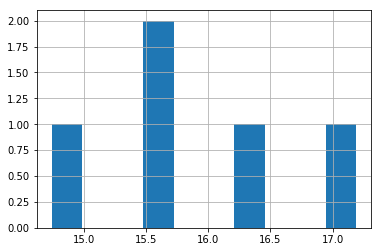

In [21]:
df.int_rate.hist();

### Clean `emp_title`

Look at top 20 titles

In [22]:
df.emp_title.value_counts().head(20)

Teacher                     2037
Manager                     1626
Registered Nurse             898
Driver                       857
Supervisor                   655
RN                           623
Sales                        586
Office Manager               574
Project Manager              540
General Manager              486
Owner                        449
Director                     374
Operations Manager           313
Engineer                     309
Truck Driver                 308
Sales Manager                288
Nurse                        281
Administrative Assistant     267
Supervisor                   260
Accountant                   259
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [23]:
df.emp_title.isna().sum()# / len(df) # /len shows it as a percent

19518

Clean the title and handle missing values
--Capitalize
--Strip spaces
--Replace 'NAN' with missing

In [24]:
df.emp_title.value_counts()

Teacher                                     2037
Manager                                     1626
Registered Nurse                             898
Driver                                       857
Supervisor                                   655
RN                                           623
Sales                                        586
Office Manager                               574
Project Manager                              540
General Manager                              486
Owner                                        449
Director                                     374
Operations Manager                           313
Engineer                                     309
Truck Driver                                 308
Sales Manager                                288
Nurse                                        281
Administrative Assistant                     267
Supervisor                                   260
Accountant                                   259
Server              

In [25]:
df.emp_title.unique()

array(['Front desk supervisor', 'Executive Director', 'Office Manager',
       ..., 'President - North America', 'Estimator/Supervisor',
       'sr register csa'], dtype=object)

In [26]:
df.emp_title.value_counts(dropna=False).head()

NaN                 19518
Teacher              2037
Manager              1626
Registered Nurse      898
Driver                857
Name: emp_title, dtype: int64

In [27]:
isinstance('dog', str)

True

In [28]:
import numpy as np
example = ['owner', 'Supervisor ', ' Project manager', np.nan]
def clean_emp_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else: 
    return 'Missing'
#for ex in example:
 # print(clean_emp_title(ex))
  
#list comprehension
[clean_emp_title(x) for x in example] # this is esentially the 'for' loop

['Owner', 'Supervisor', 'Project Manager', 'Missing']

In [29]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)
df['emp_title'].head(20)

0       Front Desk Supervisor
1          Executive Director
2              Office Manager
3               Store Manager
4                Area Manager
5                         Svp
6                 Vp Of Sales
7                       Sales
8                          Rn
9             Project Manager
10          Custom Applicator
11                 Av Manager
12    Human Resources Liaison
13                    Missing
14                      Agent
15            Sales/Marketing
16                        Ceo
17                  Route Rep
18                Maintenance
19        Executive Assistant
Name: emp_title, dtype: object

In [30]:
df.emp_title.nunique()

31429

In [31]:
df.emp_title.value_counts().head(10)

Missing             19518
Teacher              2465
Manager              2172
Registered Nurse     1306
Driver               1194
Supervisor           1109
Office Manager        834
Sales                 806
Truck Driver          767
General Manager       737
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [32]:
df['emp_title'].str.contains('Manager').head(10)# case=False)


0    False
1    False
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9     True
Name: emp_title, dtype: bool

In [33]:
df['emp_title'].iloc[0:10]

0    Front Desk Supervisor
1       Executive Director
2           Office Manager
3            Store Manager
4             Area Manager
5                      Svp
6              Vp Of Sales
7                    Sales
8                       Rn
9          Project Manager
Name: emp_title, dtype: object

In [34]:
df['emp_title_manager'] = df.emp_title.str.contains('Manager')
df['emp_title_manager'].value_counts()

False    99713
True     15962
Name: emp_title_manager, dtype: int64

In [35]:
df.groupby('emp_title_manager').int_rate.mean()

emp_title_manager
False    16.795000
True     15.293333
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [36]:
df['issue_d'].describe()

count       115675
unique           3
top       Jan-2019
freq         43584
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [38]:
df['issue_d'].describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

In [39]:
df['issue_d'].iloc[0:5].dt.year # use .month to see the month

0    2019
1    2019
2    2019
3    2019
4    2019
Name: issue_d, dtype: int64

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [41]:
df['issue_month'].value_counts()

1    43584
3    36106
2    35985
Name: issue_month, dtype: int64

In [42]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_month
0,NaN,NaN,20000,20000,20000,60 months,17.19,499.10,C,C5,Front Desk Supervisor,6 years,RENT,47000.0,Source Verified,2019-03-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,3
1,NaN,NaN,12000,12000,12000,36 months,16.40,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,2019-03-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,3
2,NaN,NaN,3000,3000,3000,36 months,14.74,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,2019-03-01,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['days_since_earliest_cr_line'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [45]:
df['days_since_earliest_cr_line'].describe() # 3 years is the youngets credit line to apply for and 75 years oldest

count    115675.000000
mean       5972.244634
std        2904.216417
min        1124.000000
25%        4141.000000
50%        5358.000000
75%        7367.000000
max       27453.000000
Name: days_since_earliest_cr_line, dtype: float64

In [46]:
[col for col in df if col.endswith('_d')] # This locates every column that ends in d

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
  df[col] = pd.to_datetime(df[col])

In [48]:
df.describe(include='datetime')

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,115675,115675,115445,110769,115673
unique,3,652,7,3,7
top,2019-01-01 00:00:00,2006-08-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00
freq,43584,1033,102101,110738,111240
first,2019-01-01 00:00:00,1944-01-01 00:00:00,2019-01-01 00:00:00,2019-06-01 00:00:00,2018-12-01 00:00:00
last,2019-03-01 00:00:00,2016-02-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-06-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [51]:
df.term.value_counts()

 36 months    78429
 60 months    37246
Name: term, dtype: int64

In [53]:
df['term'].describe()

count         115675
unique             2
top        36 months
freq           78429
Name: term, dtype: object

In [55]:
df.term.str.replace('months','').astype(float)

0         60.0
1         36.0
2         36.0
3         36.0
4         36.0
5         60.0
6         60.0
7         60.0
8         36.0
9         36.0
10        60.0
11        36.0
12        36.0
13        36.0
14        36.0
15        36.0
16        60.0
17        60.0
18        36.0
19        36.0
20        60.0
21        60.0
22        36.0
23        60.0
24        36.0
25        36.0
26        60.0
27        36.0
28        60.0
29        60.0
30        36.0
31        36.0
32        36.0
33        36.0
34        36.0
35        60.0
36        60.0
37        60.0
38        60.0
39        60.0
40        36.0
41        60.0
42        36.0
43        60.0
44        60.0
45        60.0
46        60.0
47        36.0
48        60.0
49        36.0
50        60.0
51        36.0
52        60.0
53        36.0
54        36.0
55        36.0
56        60.0
57        60.0
58        36.0
59        60.0
60        60.0
61        36.0
62        60.0
63        60.0
64        60.0
65        36.0
66        

In [68]:
df['loan_status_is_great'] = df['loan_status'(1,'Current')]
def loan_status_is_great:
  if 'loan_status'(1, 'Current'):
    return ('loan_status_is_great')
  else: 
    return '0'
print(df['loan_status'])

SyntaxError: ignored

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
#!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
#!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
#%cd instacart_2017_05_01